# Classify rivers

Classified based on:
- glaciers
- continental drainage
- near (old) mines

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from salishsea_tools import nc_tools, viz_tools
import datetime
import NEMO_tools as Nts
from NEMO_tools import reporj_NEMOgrid
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import csv
import matplotlib

### Load ANHA12 runoff file:

In [2]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y2001.nc','r')
# available from 2001- 2017S

In [3]:
nc_tools.show_dimensions(c)
nc_tools.show_variables(c)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 1632

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 2400

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 12

odict_keys(['nav_lon', 'nav_lat', 'time_counter', 'socoefr', 'runoff'])


In [4]:
# Load structure from sample dataset:
lon_rf = c.variables['nav_lon']
lat_rf = c.variables['nav_lat']
socoefr = c.variables['socoefr']
rf = c.variables['runoff'][0]

In [5]:
rf = np.array(rf)
lon_rf = np.array(lon_rf)
lat_rf = np.array(lat_rf)
rf[rf == 0] = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

In [6]:
# mask zero values in runoff array:
#rf = np.ma.masked_where(rf == 0.0, rf)
#lon_rf = np.ma.masked_where(rf == 0.0, lon_rf)
#lat_rf = np.ma.masked_where(rf == 0.0, lat_rf)

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0,0.5,'Latitude')

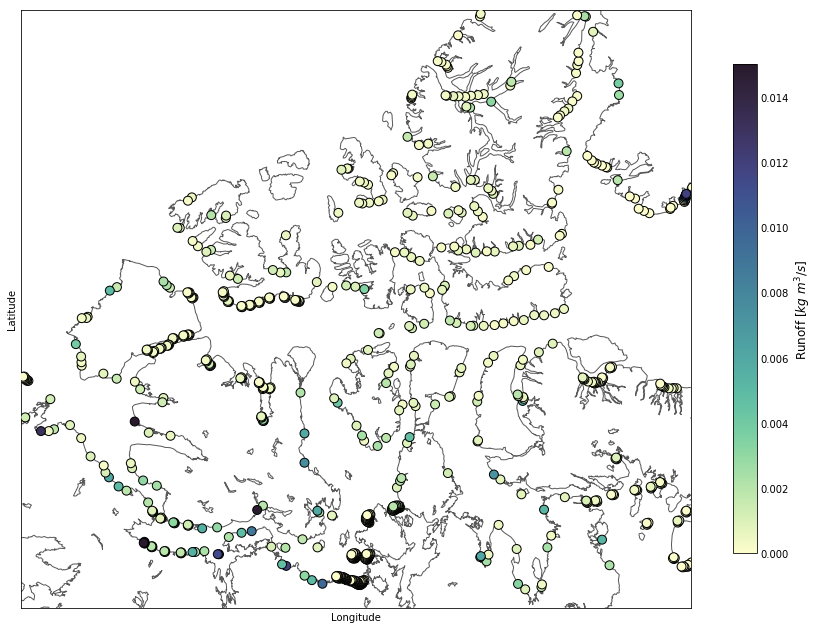

In [7]:
# Plot the runoff:
fig,ax = plt.subplots(figsize=(15,15))# Gallium:
proj=Basemap(projection='eqdc', lat_0=74, lon_0=-95, resolution='i', 
             llcrnrlon=-120, llcrnrlat=65, urcrnrlon=-50, urcrnrlat=80)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=1);
# proj.fillcontinents(color=[0.75, 0.75, 0.75], lake_color=None, zorder=2);
x_rf, y_rf = proj(lon_rf, lat_rf)

CS = proj.scatter(x_rf, y_rf, c=rf,vmin=0,vmax=0.015, s=80, cmap=cmocean.cm.deep, zorder=3, edgecolors='k')
CBar = plt.colorbar(CS, shrink=0.6)
CBar.set_label('Runoff [$kg\ m^3 / s$]', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

### Classify regions:

Class numbers:
1. Glaciers
2. Continental
3. Mines

#### All other small rivers:

In [8]:
class_river = np.empty(rf.shape)
class_river[:] = np.nan
rf[~np.isnan(rf)] = 3.0
class_river[~np.isnan(rf)] = 3.0

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0,0.5,'Latitude')

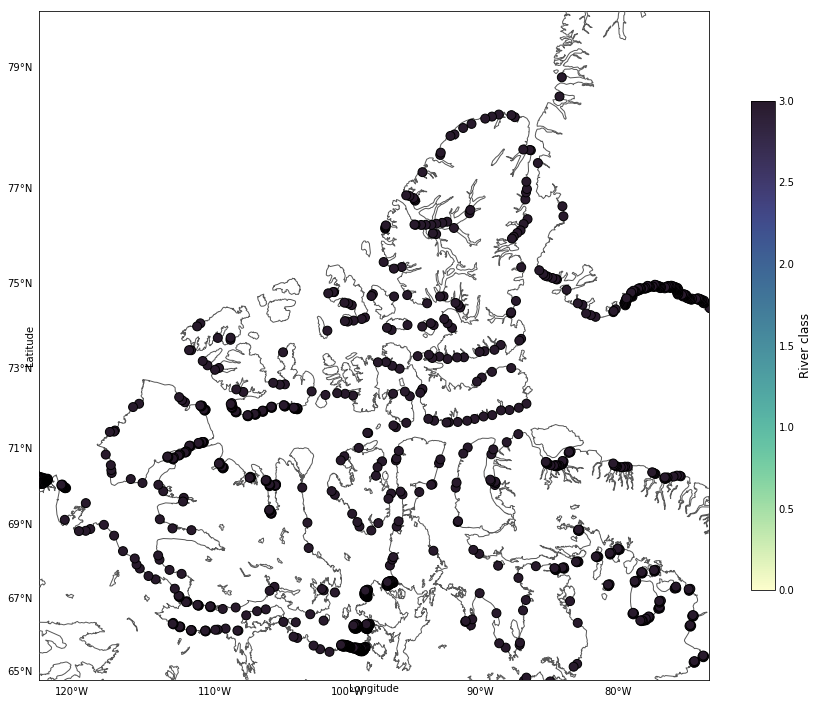

In [9]:
##### Plot the runoff:
fig,ax = plt.subplots(figsize=(15,15))# Gallium:
proj=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -98, resolution='i', width=2.25e6, height=2.25e6, ax=ax)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=3)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
    
x_rf, y_rf = proj(lon_rf, lat_rf)
CS = proj.scatter(x_rf, y_rf, c=class_river,vmin=0,vmax=3, s=80, cmap=cmocean.cm.deep, zorder=3, edgecolors='k')
CBar = plt.colorbar(CS, shrink=0.6)
CBar.set_label('River class', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#### Glacial rivers: 

In [10]:
# array of indices where latitude  & longitude condition (Greenland) is met
index1 = np.argwhere((lat_rf < 82) & (lat_rf > 73) & (lon_rf < -62) & (lon_rf > -74))
index2 = np.argwhere((lat_rf < 85) & (lat_rf > 76) & (lon_rf < -75) & (lon_rf > -85))
index3 = np.argwhere((lat_rf < 74) & (lat_rf > 71) & (lon_rf < -70) & (lon_rf > -83))
index4 = np.argwhere((lat_rf < 77) & (lat_rf > 73) & (lon_rf < -79) & (lon_rf > -84))
index5 = np.argwhere((lat_rf < 80) & (lat_rf > 78) & (lon_rf < -90) & (lon_rf > -93))
index6 = np.argwhere((lat_rf < 84) & (lat_rf > 79) & (lon_rf < -93) & (lon_rf > -97))
index7 = np.argwhere((lat_rf < 86) & (lat_rf > 73) & (lon_rf < -40) & (lon_rf > -62))

In [11]:
def classify_glacier(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
            rf[index[i][0],index[i][1]] = 1.0
            class_river[index[i][0],index[i][1]] = 1.0
    return rf, class_river

In [12]:
rf, class_river = classify_glacier(index1, rf, class_river) #Greenland
rf, class_river = classify_glacier(index2, rf, class_river) #Ellesmere Island
rf, class_river = classify_glacier(index3, rf, class_river) #Baffin Island
rf, class_river = classify_glacier(index4, rf, class_river) #Southern Ellesmere Island
rf, class_river = classify_glacier(index5, rf, class_river) #Western Ellesmere Island
rf, class_river = classify_glacier(index6, rf, class_river) #Western Ellesmere Island
rf, class_river = classify_glacier(index7, rf, class_river) #More of Greenland

Yaaay! It works!!!

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0,0.5,'Latitude')

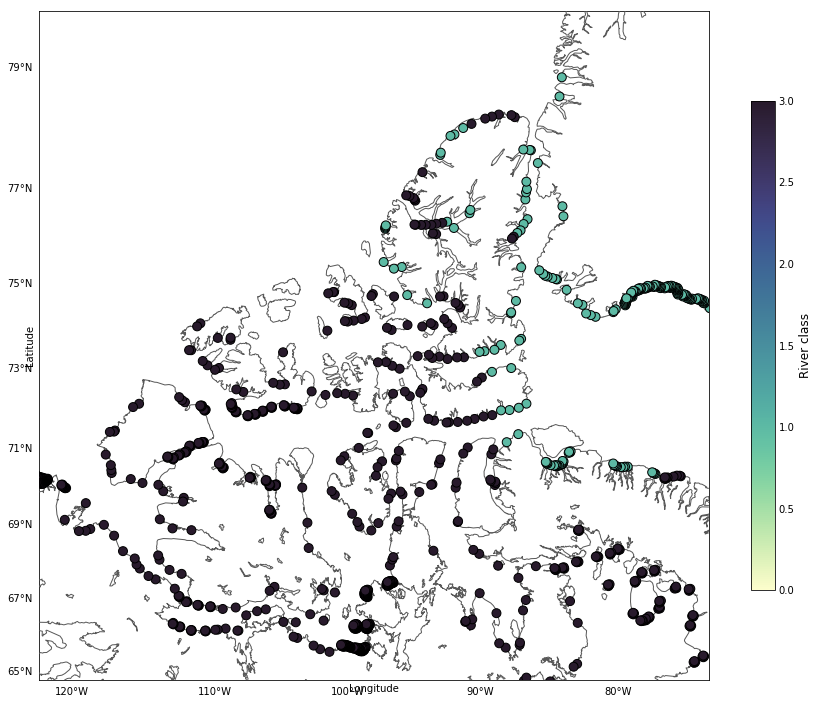

In [13]:
# Plot the runoff:
fig,ax = plt.subplots(figsize=(15,15))# Gallium:
proj=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -98, resolution='i', width=2.25e6, height=2.25e6, ax=ax)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=3)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)

x_rf, y_rf = proj(lon_rf, lat_rf)
#clev
CS = proj.scatter(x_rf, y_rf, c=rf,vmin=0,vmax=3, s=80, cmap=cmocean.cm.deep, zorder=3, edgecolors='k')
CBar = plt.colorbar(CS, shrink=0.6)
CBar.set_label('River class', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

<img src="files/distribution_of_freshwater_glaciers_icefields_map_zoom.jpg">

#### Continental drainage:

In [14]:
def classify_continental(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
            rf[index[i][0],index[i][1]] = 2.0
            class_river[index[i][0],index[i][1]] = 2.0
    return rf, class_river

<img src="files/lon_lat_ANHA12_zoom.png">

In [15]:
# array of indices where latitude  & longitude condition (Greenland) is met
index1 = np.argwhere((lat_rf < 71) & (lat_rf > 67) & (lon_rf < -118) & (lon_rf > -130))
index2 = np.argwhere((lat_rf < 68) & (lat_rf > 67) & (lon_rf < -95) & (lon_rf > -115))
index3 = np.argwhere((lat_rf < 70) & (lat_rf > 67) & (lon_rf < -88) & (lon_rf > -100))
index4 = np.argwhere((lat_rf < 70) & (lat_rf > 65) & (lon_rf < -81) & (lon_rf > -87))
index5 = np.argwhere((lat_rf < 69) & (lat_rf > 65) & (lon_rf < -80) & (lon_rf > -95))
index6 = np.argwhere((lat_rf < 69) & (lat_rf > 67) & (lon_rf < -104) & (lon_rf > -109))
index7 = np.argwhere((lat_rf < 69) & (lat_rf > 68) & (lon_rf < -116) & (lon_rf > -119))
index8 = np.argwhere((lat_rf < 69.2) & (lat_rf > 68) & (lon_rf < -113) & (lon_rf > -116))

In [16]:
rf, class_river = classify_continental(index1, rf, class_river) 
rf, class_river = classify_continental(index2, rf, class_river)
rf, class_river = classify_continental(index3, rf, class_river)
rf, class_river = classify_continental(index4, rf, class_river)
rf, class_river = classify_continental(index5, rf, class_river)
rf, class_river = classify_continental(index6, rf, class_river)
rf, class_river = classify_continental(index7, rf, class_river)
rf, class_river = classify_continental(index8, rf, class_river)

In [17]:
print(rf.shape)
print(class_river.shape)

(2400, 1632)
(2400, 1632)


Consistency check:

In [18]:
rf[~np.isnan(rf)].shape

(14472,)

In [19]:
class_river[~np.isnan(class_river)].shape

(14472,)

Combined river classification:
1. Glaciers
2. Continental
3. Other

In [24]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

In [25]:
plt.rcParams['font.family'] = 'arial'

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: Matplo

Text(0,0.5,'Latitude')

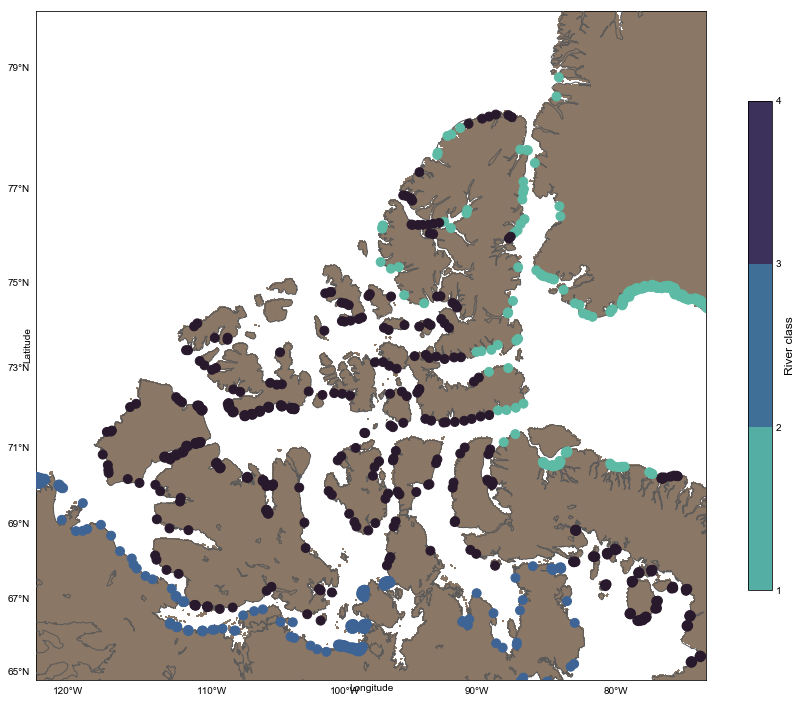

In [30]:
regions = ['Normal rivers','Glacial rivers','Continental rivers']
clev = [1,2,3,4]

# Plot the runoff:
fig,ax = plt.subplots(figsize=(15,15))# Gallium:
proj=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -98, resolution='i', width=2.25e6, height=2.25e6, ax=ax)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=3)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)

x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj.pcolor(x2,y2,z2, vmin=-1, zorder=1, vmax = 0.3, cmap=cmap1)

x_rf, y_rf = proj(lon_rf, lat_rf)
CS1 = proj.contourf(x_rf, y_rf, class_river, clev, vmin=0,vmax=4, cmap=cmocean.cm.deep)
CS = proj.scatter(x_rf, y_rf, c=class_river,vmin=0,vmax=3, s=80, cmap=cmocean.cm.deep, zorder=3)
CBar = plt.colorbar(CS1, shrink=0.6)
CBar.set_label('River class', fontsize=12)
CBar.ax.tick_params(axis='y', length=0) 
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# fig.savefig('river_class.png',bbox_inches='tight')

In [21]:
print(x_rf.shape)
print(y_rf.shape)
print(class_river.shape)

(2400, 1632)
(2400, 1632)
(2400, 1632)


# Write classification to file:

In [22]:
# Load structure from sample dataset:
BX = c.dimensions['x']
BY = c.dimensions['y']

In [59]:
# Setup the new NetCDF file:
ncd = nc.Dataset('river_class_201807.nc', 'w', zlib=True)
nc_tools.init_dataset_attrs(
    ncd,
    title='River classification',
    notebook_name='river_classification',
    nc_filepath='./river_classification.nc',
    comment='river classification')

ncd.createDimension('x',len(BX))
ncd.createDimension('y',len(BY))

file format: NETCDF4
Conventions: CF-1.6
title: River classification
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/ccar-modeling/analysis-birgit/src/tip/notebooks/rivers/river_classification.ipynb
references: REQUIRED
history: [2018-07-25 10:49:39] Created netCDF4 zlib=True dataset.
comment: river classification


<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 2400

In [60]:
rclass = ncd.createVariable('rclass', 'int16', ('y','x'))
rclass.units = 'river class from 1-3'
rclass.long_name = 'river class'
rclass[:] = class_river

In [61]:
nc_tools.check_dataset_attrs(ncd)
ncd.close()

Missing value for dataset attribute: references


### Nice figure of classification: